In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Data/MNCAATourneyCompactResults.csv')

In [4]:
df.index
df.tail()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
2246,2019,146,1120,77,1246,71,N,1
2247,2019,146,1277,68,1181,67,N,0
2248,2019,152,1403,61,1277,51,N,0
2249,2019,152,1438,63,1120,62,N,0
2250,2019,154,1438,85,1403,77,N,1


In [5]:
#merge seeds and box score with compact results 
Seeds = pd.read_csv('../Data/MNCAATourneySeeds.csv')
BoxScore = pd.read_csv('../Data/MNCAATourneyDetailedResults.csv')
df = df.merge(Seeds, how='left', left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID']).drop('TeamID', axis=1).rename(columns={'Seed': 'WSeed'})
df = df.merge(Seeds, how='left', left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID']).drop('TeamID', axis=1).rename(columns={'Seed': 'LSeed'})

df = df.merge(BoxScore, how='left', left_on=['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc', 'NumOT'], right_on=['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc', 'NumOT'])

#seed to float
df['WSeed'] = df['WSeed'].str.replace(r'[^0-9]', '').astype('float')
df['LSeed'] = df['LSeed'].str.replace(r'[^0-9]', '').astype('float')

#add point differential 
NewCol = df["WScore"] - df["LScore"]
df.insert(0, 'PointDiff', NewCol)


df.head()


<ipython-input-5-e1151862ac39>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['WSeed'] = df['WSeed'].str.replace(r'[^0-9]', '').astype('float')
<ipython-input-5-e1151862ac39>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['LSeed'] = df['LSeed'].str.replace(r'[^0-9]', '').astype('float')


,PointDiff,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,9,1985,136,1116,63,1234,54,N,0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1985,136,1120,59,1345,58,N,0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25,1985,136,1207,68,1250,43,N,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1985,136,1229,58,1425,55,N,0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,1985,136,1242,49,1325,38,N,0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.dropna()
df

,PointDiff,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
1136,8,2003,134,1421,92,1411,84,N,1,16.0,...,31.0,14.0,31.0,17.0,28.0,16.0,15.0,5.0,0.0,22.0
1137,29,2003,136,1112,80,1436,51,N,0,1.0,...,16.0,7.0,7.0,8.0,26.0,12.0,17.0,10.0,3.0,15.0
1138,13,2003,136,1113,84,1272,71,N,0,10.0,...,28.0,14.0,21.0,20.0,22.0,11.0,12.0,2.0,5.0,18.0
1139,6,2003,136,1141,79,1166,73,N,0,11.0,...,17.0,12.0,17.0,14.0,17.0,20.0,21.0,6.0,6.0,21.0
1140,2,2003,136,1143,76,1301,74,N,1,8.0,...,21.0,15.0,20.0,10.0,26.0,16.0,14.0,5.0,8.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,6,2019,146,1120,77,1246,71,N,1,5.0,...,21.0,12.0,21.0,11.0,30.0,14.0,14.0,5.0,5.0,19.0
2247,1,2019,146,1277,68,1181,67,N,0,2.0,...,21.0,8.0,13.0,13.0,29.0,14.0,17.0,4.0,9.0,9.0
2248,10,2019,152,1403,61,1277,51,N,0,3.0,...,24.0,14.0,18.0,8.0,28.0,6.0,11.0,1.0,2.0,15.0
2249,1,2019,152,1438,63,1120,62,N,0,1.0,...,31.0,11.0,14.0,9.0,24.0,9.0,5.0,3.0,3.0,12.0


In [7]:
df["PointDiff"] = df["PointDiff"].astype(float)
#add seed differential 
NewCol1 = df["WSeed"] - df["LSeed"]
df.insert(loc=0, column='SeedDiff', value=NewCol1)





In [8]:
#Points
df['WPts'] = df.apply(lambda x: 2*x.WFGM + x.WFGM3 + x.WFTM, axis=1)
df['LPts'] = df.apply(lambda x: 2*x.LFGM + x.LFGM3 + x.LFTM, axis=1)

#Possessions for each team
#This is the generally accepted best method for calculating possessions
wPos = df.apply(lambda x: 0.96*(x.WFGA + x.WTO + 0.44*x.WFTA - x.WOR), axis=1)
lPos = df.apply(lambda x: 0.96*(x.LFGA + x.LTO + 0.44*x.LFTA - x.LOR), axis=1)

#average possessions for good estimate
df['Pos'] = (wPos+lPos)/2

#Offensive efficiency = 100 x (Points / Possessions)
df['WOffRtg'] = df.apply(lambda x: 100 * (x.WPts / x.Pos), axis=1)
df['LOffRtg'] = df.apply(lambda x: 100 * (x.LPts / x.Pos), axis=1)
#Defensive efficiency = 100 x (Opponent points / Opponent possessions)
df['WDefRtg'] = df.LOffRtg
df['LDefRtg'] = df.WOffRtg
#Net Rating = Off.Rtg - Def.Rtg
df['WNetRtg'] = df.apply(lambda x:(x.WOffRtg - x.WDefRtg), axis=1)
df['LNetRtg'] = df.apply(lambda x:(x.LOffRtg - x.LDefRtg), axis=1)

#Field Goal Percantage
df['WFGP'] = df.apply(lambda x: (x.WFGM / x.WFGA), axis=1)
df['LFGP'] = df.apply(lambda x: (x.LFGM / x.LFGA), axis=1)


df['FGDif'] = df.apply(lambda x: (x.WFGP - x.LFGP), axis=1)
df['AstDif'] = df.apply(lambda x: (x.WAst / x.LAst), axis=1)

#True Shooting Percentage = Points/2(Field Goal Attempts + .44(Free Throw Attempts))
df['WTS%'] = df.apply(lambda x: 100*((x.WFGM3 + 2*x.WFGM + x.WFTM) / (2*(x.WFGA + .44*x.WFTA))), axis=1)
df['LTS%'] = df.apply(lambda x: 100*((x.LFGM3 + 2*x.LFGM + x.WFTM) / (2*(x.LFGA + .44*x.LFTA))), axis=1)

df.tail()


,SeedDiff,PointDiff,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,...,WDefRtg,LDefRtg,WNetRtg,LNetRtg,WFGP,LFGP,FGDif,AstDif,WTS%,LTS%
2246,3.0,6.0,2019,146,1120,77,1246,71,N,1,...,101.451760,110.025149,8.573388,-8.573388,0.400000,0.442623,-0.042623,0.571429,50.952885,54.812073
2247,1.0,1.0,2019,146,1277,68,1181,67,N,0,...,103.120075,104.659180,1.539106,-1.539106,0.428571,0.456140,-0.027569,1.285714,46.806167,48.628827
2248,1.0,10.0,2019,152,1403,61,1277,51,N,0,...,89.556642,107.116768,17.560126,-17.560126,0.431373,0.319149,0.112224,1.333333,53.772920,40.968682
2249,-4.0,1.0,2019,152,1438,63,1120,62,N,0,...,110.929806,112.718997,1.789190,-1.789190,0.490196,0.381818,0.108378,1.666667,55.970149,46.599084
2250,-2.0,8.0,2019,154,1438,85,1403,77,N,1,...,116.480298,128.582147,12.101849,-12.101849,0.457627,0.428571,0.029056,1.666667,61.487269,60.344828


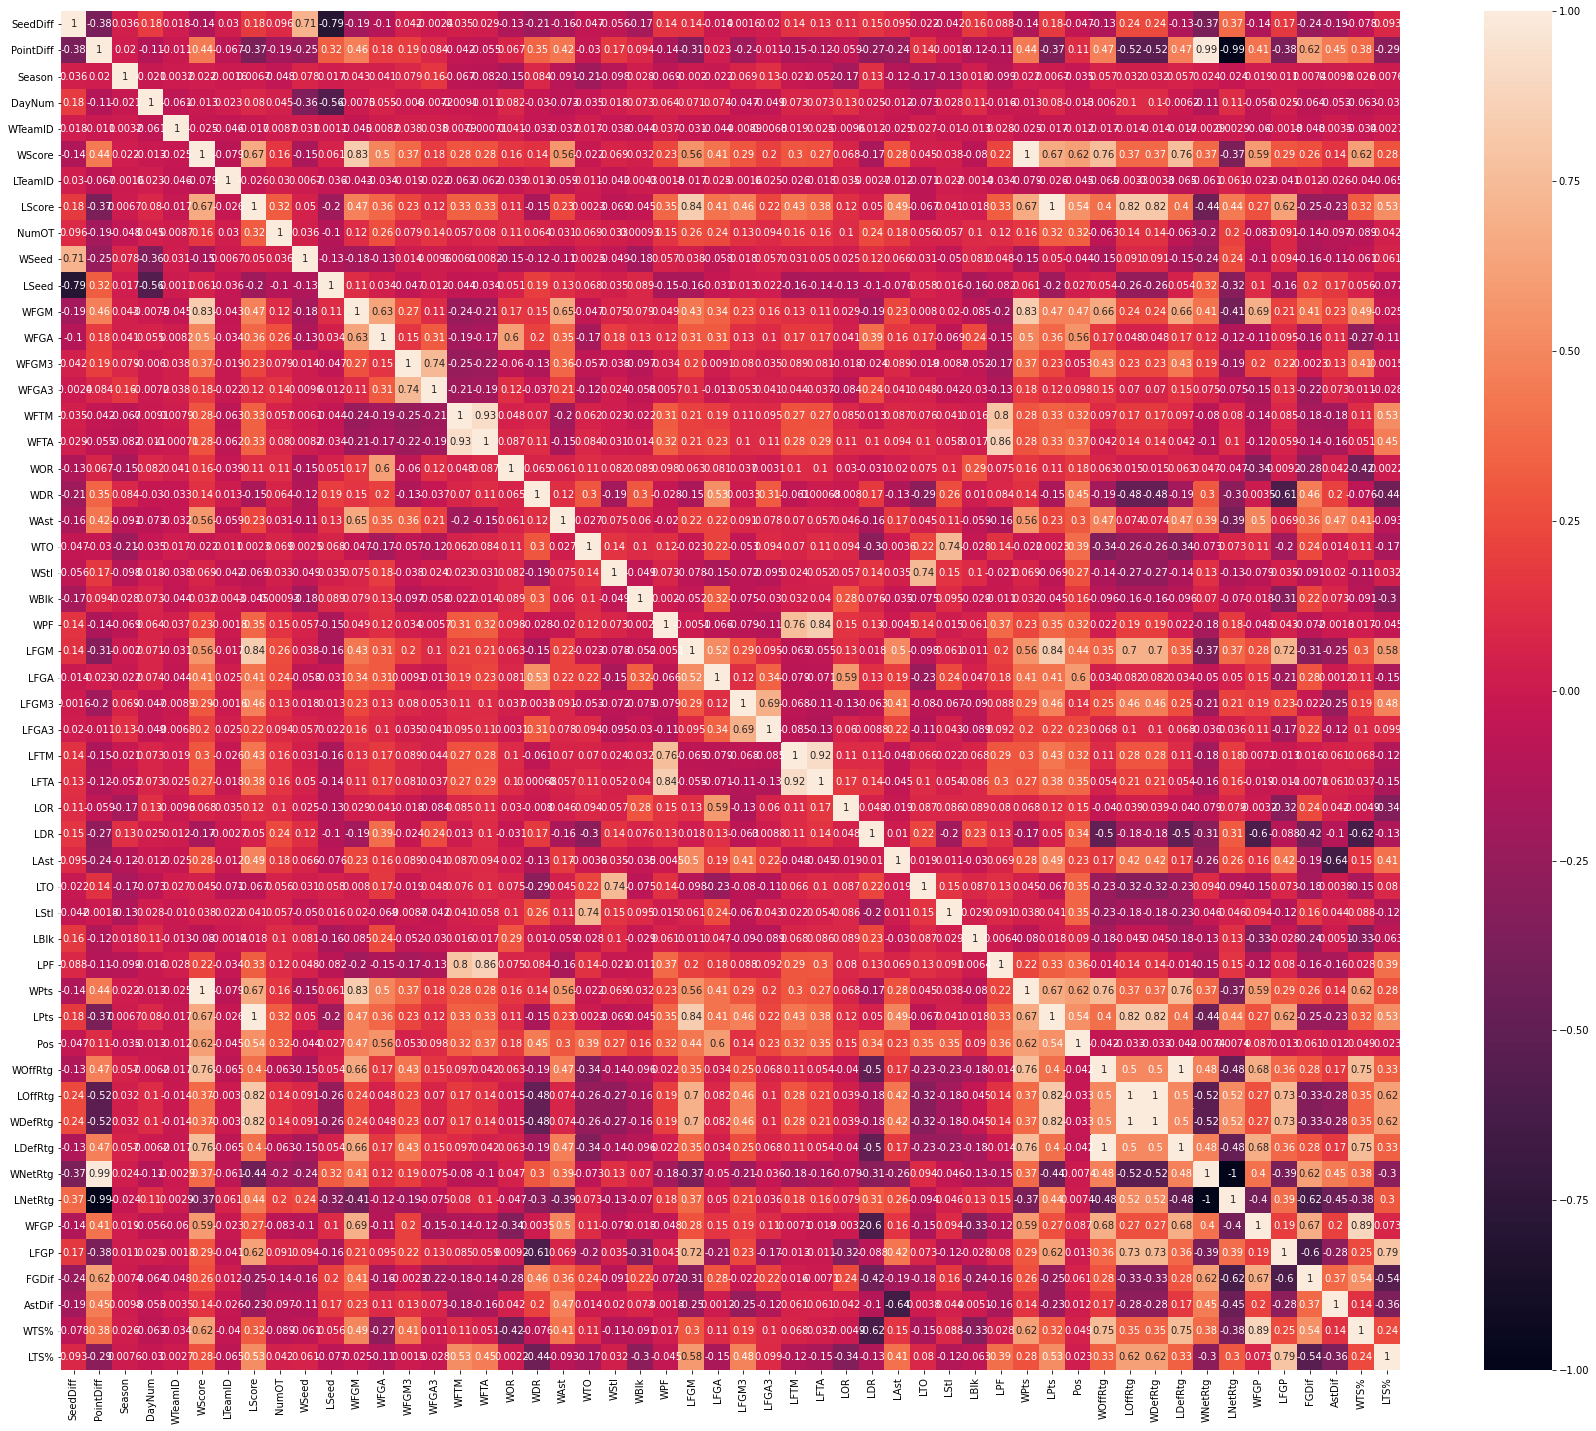

In [9]:
corrMatrix = df[df.columns[:]].corr()
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#Messed around with x values and these got highest R^2
X = df[['WNetRtg','FGDif','AstDif']].dropna()
y = df.loc[X.index]['PointDiff']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
print(model.intercept_)
print(model.coef_)

-0.10387489970471542
[0.62395847 1.70725587 0.09594934]


In [17]:
model.score(X_test, y_test)


0.9805898208078053

Text(0, 0.5, 'Point Differential')

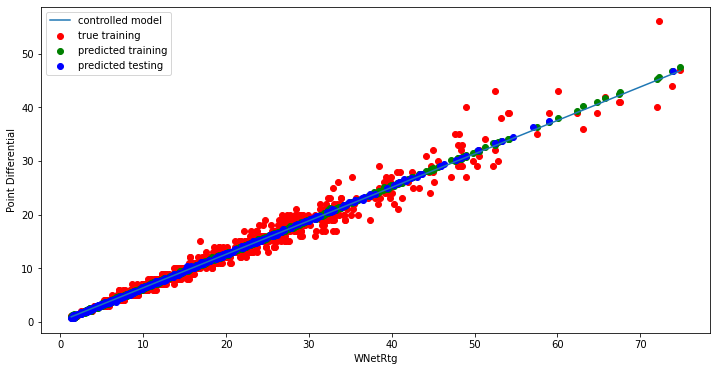

In [18]:
import numpy as np
# quickly visualize results
col_name = 'WNetRtg'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),100)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Point Differential')

In [19]:
#Next job is to collect averages for these stats from 2020 season
df2020 = pd.read_csv('../RegSeasonResults.csv')
df2020 = df2020[df2020.Season == 2020]
df2020.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
87504,2020,1,1114,67,1283,66,A,0,27,52,...,28,12,18,10,16,10,10,7,3,15
87505,2020,1,1116,91,1349,43,H,0,37,67,...,25,9,15,6,21,7,27,9,2,16
87506,2020,1,1120,83,1204,74,H,0,29,58,...,18,15,21,5,22,8,18,10,2,21
87507,2020,1,1124,105,1146,61,H,0,40,71,...,23,13,24,8,22,11,15,5,6,19
87508,2020,1,1135,73,1136,71,A,0,23,53,...,28,13,21,13,24,14,12,9,0,24


In [20]:
df2020['WFGP'] = df2020.apply(lambda x: (x.WFGM / x.WFGA), axis=1)
df2020['LFGP'] = df2020.apply(lambda x: (x.LFGM / x.LFGA), axis=1)


df2020['FGDif'] = df2020.apply(lambda x: (x.WFGP - x.LFGP), axis=1)
df2020['AstDif'] = df2020.apply(lambda x: (x.WAst / x.LAst), axis=1)

wPos = df2020.apply(lambda x: 0.96*(x.WFGA + x.WTO + 0.44*x.WFTA - x.WOR), axis=1)
lPos = df2020.apply(lambda x: 0.96*(x.LFGA + x.LTO + 0.44*x.LFTA - x.LOR), axis=1)

#average possessions for good estimate
df2020['Pos'] = (wPos+lPos)/2
df2020['WPts'] = df2020.apply(lambda x: 2*x.WFGM + x.WFGM3 + x.WFTM, axis=1)
df2020['LPts'] = df2020.apply(lambda x: 2*x.LFGM + x.LFGM3 + x.LFTM, axis=1)
df2020['WOffRtg'] = df2020.apply(lambda x: 100 * (x.WPts / x.Pos), axis=1)
df2020['LOffRtg'] = df2020.apply(lambda x: 100 * (x.LPts / x.Pos), axis=1)
#Defensive efficiency = 100 x (Opponent points / Opponent possessions)
df2020['WDefRtg'] = df2020.LOffRtg
df2020['LDefRtg'] = df2020.WOffRtg
#Net Rating = Off.Rtg - Def.Rtg
df2020['WNetRtg'] = df2020.apply(lambda x:(x.WOffRtg - x.WDefRtg), axis=1)
df2020['LNetRtg'] = df2020.apply(lambda x:(x.LOffRtg - x.LDefRtg), axis=1)
df2020.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,AstDif,Pos,WPts,LPts,WOffRtg,LOffRtg,WDefRtg,LDefRtg,WNetRtg,LNetRtg
87504,2020,1,1114,67,1283,66,A,0,27,52,...,1.700000,58.8096,67,66,113.926978,112.226575,112.226575,113.926978,1.700403,-1.700403
87505,2020,1,1116,91,1349,43,H,0,37,67,...,2.714286,79.8912,91,43,113.904911,53.823200,53.823200,113.904911,60.081711,-60.081711
87506,2020,1,1120,83,1204,74,H,0,29,58,...,1.625000,75.9552,83,74,109.274941,97.425851,97.425851,109.274941,11.849090,-11.849090
87507,2020,1,1124,105,1146,61,H,0,40,71,...,2.272727,75.2256,105,61,139.580143,81.089416,81.089416,139.580143,58.490727,-58.490727
87508,2020,1,1135,73,1136,71,A,0,23,53,...,0.642857,66.6624,73,71,109.507008,106.506816,106.506816,109.507008,3.000192,-3.000192


In [21]:
dfTeams = pd.read_csv('../Data/MTeams.csv')
dfTeams['Games'] = 0
dfTeams['TotalWNetRtg'] = 0
dfTeams['TotalFGDif'] = 0
dfTeams['TotalAstDif'] = 0
dfTeams.head()

,Unnamed: 0,TeamID,TeamName,FirstD1Season,LastD1Season,Games,TotalWNetRtg,TotalFGDif,TotalAstDif,AvgNetRtg,AvgFGDif,AvgAstDif,PredPtDif
0,0,1101,Abilene Chr,2014,2021,0,0,0,0,5.632330,-0.016336,0.878397,3.467014
1,1,1102,Air Force,1985,2021,0,0,0,0,-5.355974,-0.021938,-0.389858,-3.521002
2,2,1103,Akron,1985,2021,0,0,0,0,11.742042,0.027497,0.859227,7.352458
3,3,1104,Alabama,1985,2021,0,0,0,0,4.025238,0.012593,0.277939,2.455927
4,4,1105,Alabama A&M,2000,2021,0,0,0,0,-14.375073,-0.072414,-0.841061,-9.278397


In [22]:
for row in df2020.iterrows():
    dfTeams.loc[dfTeams['TeamID'] == row[1]['WTeamID'], ['Games']] += 1
    dfTeams.loc[dfTeams['TeamID'] == row[1]['LTeamID'], ['Games']] += 1
    dfTeams.loc[dfTeams['TeamID'] == row[1]['WTeamID'], ['TotalWNetRtg']] += row[1]['WNetRtg']
    dfTeams.loc[dfTeams['TeamID'] == row[1]['LTeamID'], ['TotalWNetRtg']] -= row[1]['WNetRtg']
    dfTeams.loc[dfTeams['TeamID'] == row[1]['WTeamID'], ['TotalFGDif']] += row[1]['FGDif']
    dfTeams.loc[dfTeams['TeamID'] == row[1]['LTeamID'], ['TotalFGDif']] -= row[1]['FGDif']
    dfTeams.loc[dfTeams['TeamID'] == row[1]['WTeamID'], ['TotalAstDif']] += row[1]['AstDif']
    dfTeams.loc[dfTeams['TeamID'] == row[1]['LTeamID'], ['TotalAstDif']] -= row[1]['AstDif']
dfTeams.head()

,Unnamed: 0,TeamID,TeamName,FirstD1Season,LastD1Season,Games,TotalWNetRtg,TotalFGDif,TotalAstDif,AvgNetRtg,AvgFGDif,AvgAstDif,PredPtDif
0,0,1101,Abilene Chr,2014,2021,27,152.072901,-0.441069,23.716706,5.632330,-0.016336,0.878397,3.467014
1,1,1102,Air Force,1985,2021,31,-166.035180,-0.680073,-12.085589,-5.355974,-0.021938,-0.389858,-3.521002
2,2,1103,Akron,1985,2021,29,340.519218,0.797427,24.917584,11.742042,0.027497,0.859227,7.352458
3,3,1104,Alabama,1985,2021,31,124.782390,0.390388,8.616124,4.025238,0.012593,0.277939,2.455927
4,4,1105,Alabama A&M,2000,2021,30,-431.252178,-2.172411,-25.231838,-14.375073,-0.072414,-0.841061,-9.278397


In [23]:
dfTeams['AvgNetRtg'] = dfTeams.apply(lambda x: x.TotalWNetRtg/x.Games if x.Games > 0 else 0, axis=1)
dfTeams['AvgFGDif'] = dfTeams.apply(lambda x:  x.TotalFGDif/x.Games if x.Games > 0 else 0, axis=1)
dfTeams['AvgAstDif'] = dfTeams.apply(lambda x: x.TotalAstDif/x.Games if x.Games > 0 else 0, axis=1)
dfTeams['PredPtDif'] = dfTeams.apply(lambda x: -0.104 + x.AvgNetRtg*0.624 + x.AvgFGDif*1.707 + x.AvgAstDif*0.096, axis=1)
dfTeams.head()

,Unnamed: 0,TeamID,TeamName,FirstD1Season,LastD1Season,Games,TotalWNetRtg,TotalFGDif,TotalAstDif,AvgNetRtg,AvgFGDif,AvgAstDif,PredPtDif
0,0,1101,Abilene Chr,2014,2021,27,152.072901,-0.441069,23.716706,5.632330,-0.016336,0.878397,3.467014
1,1,1102,Air Force,1985,2021,31,-166.035180,-0.680073,-12.085589,-5.355974,-0.021938,-0.389858,-3.521002
2,2,1103,Akron,1985,2021,29,340.519218,0.797427,24.917584,11.742042,0.027497,0.859227,7.352458
3,3,1104,Alabama,1985,2021,31,124.782390,0.390388,8.616124,4.025238,0.012593,0.277939,2.455927
4,4,1105,Alabama A&M,2000,2021,30,-431.252178,-2.172411,-25.231838,-14.375073,-0.072414,-0.841061,-9.278397


In [24]:
dfTeams.to_csv('../Data/MTeams.csv')

In [30]:
dfSeeds = pd.read_csv('../Data/MNCAATourneySeeds.csv')
dfSeeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [32]:
dfSeeds['Seed'] = dfSeeds['Seed'].str[1:]
dfSeeds.head()

,Season,Seed,TeamID
0,1985,01,1207
1,1985,02,1210
2,1985,03,1228
3,1985,04,1260
4,1985,05,1374


In [59]:
dfSeeds['IntSeed'] = dfSeeds.apply(lambda x: int(x.Seed[:-1]) if x.Seed[-1] == 'a' or x.Seed[-1] == 'b' else int(x.Seed), axis=1)


16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
12
12
16
16
16
16
11
11
12
12
16
16
16
16
14
14
16
16
11
11
16
16
13
13
16
16
11
11
12
12
16
16
11
11
16
16
16
16
11
11
11
11
16
16
11
11
16
16
11
11
16
16
16
16
11
11
11
11
16
16
11
11
16
16
11
11
16
16
11
11
16
16


In [62]:
dfTCon = pd.read_csv('../Data/MTeamConferences.csv')
dfTCon['Appearances'] = dfTCon.apply(lambda x: 0, axis=1)
dfTCon['SeedTotal'] = dfTCon.apply(lambda x: 0, axis=1)
dfTCon.head()

,Season,TeamID,ConfAbbrev,Appearances,SeedTotal
0,1985,1102,wac,0,0
1,1985,1103,ovc,0,0
2,1985,1104,sec,0,0
3,1985,1106,swac,0,0
4,1985,1108,swac,0,0


In [68]:
for index, row in dfSeeds.iterrows():
    dfTCon.loc[dfTCon['TeamID'] == row['TeamID'], ['Appearances']] += 1
    dfTCon.loc[dfTCon['TeamID'] == row['TeamID'], ['SeedTotal']] += row['IntSeed']
dfTCon.head()

,Season,TeamID,ConfAbbrev,Appearances,SeedTotal
0,1985,1102,wac,4,48
1,1985,1103,ovc,8,110
2,1985,1104,sec,32,206
3,1985,1106,swac,8,128
4,1985,1108,swac,4,62


In [69]:
dfCon = pd.read_csv('../Data/Conferences.csv')
dfCon['Appearances'] = dfTCon.apply(lambda x: 0, axis=1)
dfCon['SeedTotal'] = dfTCon.apply(lambda x: 0, axis=1)
dfCon.head()

,ConfAbbrev,Description,Appearances,SeedTotal
0,a_sun,Atlantic Sun Conference,0,0
1,a_ten,Atlantic 10 Conference,0,0
2,aac,American Athletic Conference,0,0
3,acc,Atlantic Coast Conference,0,0
4,aec,America East Conference,0,0


In [70]:
for index, row in dfTCon.iterrows():
    dfCon.loc[dfTCon['ConfAbbrev'] == row['ConfAbbrev'], ['Appearances']] += row['Appearances']
    dfCon.loc[dfTCon['ConfAbbrev'] == row['ConfAbbrev'], ['SeedTotal']] += row['SeedTotal']
dfCon.head()

,ConfAbbrev,Description,Appearances,SeedTotal
0,a_sun,Atlantic Sun Conference,4380,41686
1,a_ten,Atlantic 10 Conference,2566,34994
2,aac,American Athletic Conference,13048,78442
3,acc,Atlantic Coast Conference,2458,38366
4,aec,America East Conference,2458,38366


In [72]:
dfCon['SeedAvg'] = dfCon.apply(lambda x: x.SeedTotal/x.Appearances, axis=1)
dfCon.head()
dfCon.tail()               

,ConfAbbrev,Description,Appearances,SeedTotal,SeedAvg
46,sun_belt,Sun Belt Conference,2520,32544,12.914286
47,swac,Southwest Athletic Conference,14781,86484,5.851025
48,swc,Southwest Conference,2520,32544,12.914286
49,wac,Western Athletic Conference,4650,46182,9.931613
50,wcc,West Coast Conference,504,5312,10.539683
